In [26]:
import os
import random
import numpy as np
import torch
import glob
import time
import matplotlib.pyplot as plt
from torch.autograd import Variable
from utils.architectures.autoreg import SimpleReg, ComplexReg, SimplestReg

regressor = SimpleReg(num_classes=16)
regressor.cuda()
regressor.load_state_dict(torch.load("models/model11-22:05:36"))
regressor.eval()

test_arr = np.load("MRF_test_magnitude/MRF_norm_volunteer12_7.npy")
x = np.load("/mikQNAP/augmented_data/T1w_test/T1_norm_volunteer12_7.npy")
print(test_arr.shape)

test1 = test_arr.reshape(500,-1).T
test1 = Variable(torch.from_numpy(test1).type(torch.FloatTensor))
test1 = test1.cuda().view(-1,500,1)

T1_array = np.array([])

slice_len = int(np.ceil(test1.size()[0]/16))
for i in range(16):
    T1 = regressor(test1[i*slice_len:(i+1)*slice_len])
    T1 = T1.data.max(1)[1]
    T1 = T1.data.cpu().numpy()
    T1_array = np.concatenate((T1_array, T1.flatten()))

print("mean: ", np.mean(T1_array))

(500, 320, 320)
mean:  1.916103515625


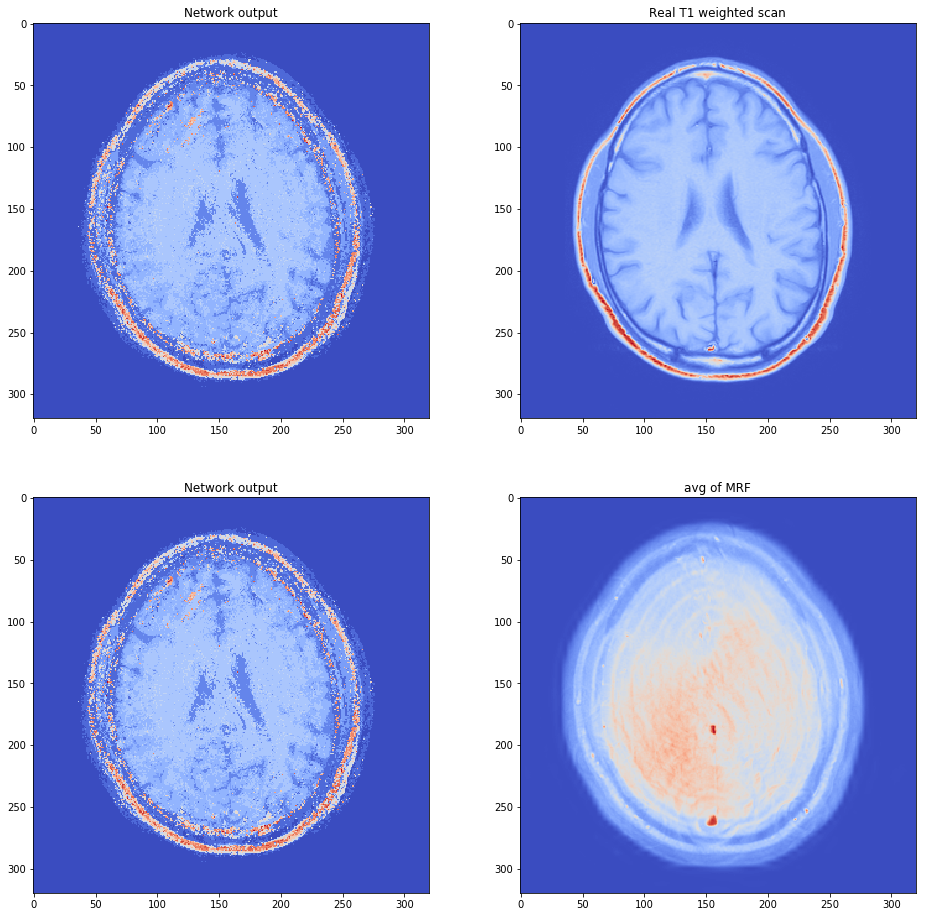

In [27]:
fig = plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
plt.title("Network output")
plt.imshow(T1_array.reshape(320,320), cmap="coolwarm")

plt.subplot(2, 2, 2)
plt.title("Real T1 weighted scan")
plt.imshow(x[0], cmap="coolwarm")

plt.subplot(2, 2, 3)
plt.title("Network output")
plt.imshow(T1_array.reshape(320,320), cmap="coolwarm")

plt.subplot(2, 2, 4)
plt.title("avg of MRF")
plt.imshow(np.mean(test_arr, 0), cmap="coolwarm")

plt.show()

In [45]:
test_arr = np.load("MRF_magnitude/MRF_norm_volunteer1_1.npy")
x = np.load("/mikQNAP/augmented_data/T1w/T1_norm_volunteer1_1.npy")
print(test_arr.shape)

(500, 320, 320)


In [46]:
test1 = test_arr.reshape(500,-1).T

In [47]:
test1.shape

(102400, 500)

In [48]:
test1 = Variable(torch.from_numpy(test1))
print(test1.size())

torch.Size([102400, 500])


In [49]:
T1 = regressor(test1).data.max(1)[1]
T1 = T1.data.numpy()
print(T1.shape)

(102400,)


In [50]:
print(np.mean(T1))

2.3053125


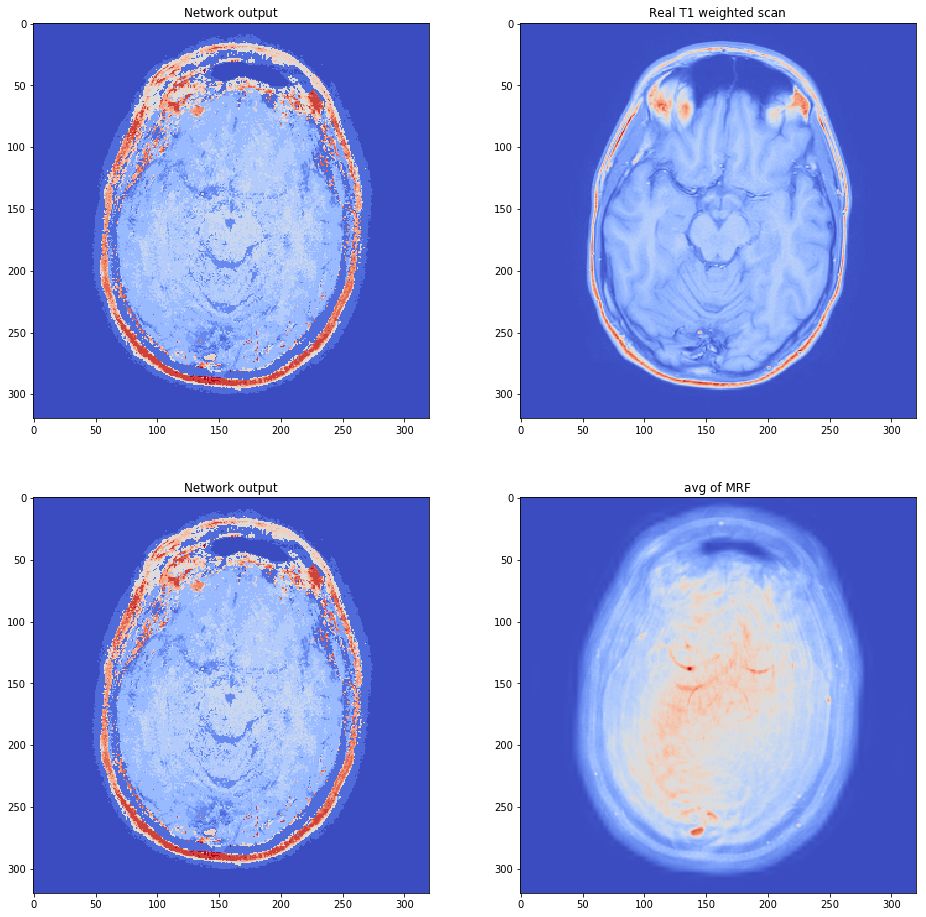

In [51]:
fig = plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
plt.title("Network output")
plt.imshow(T1.reshape(320,320), cmap="coolwarm")

plt.subplot(2, 2, 2)
plt.title("Real T1 weighted scan")
plt.imshow(x[0], cmap="coolwarm")

plt.subplot(2, 2, 3)
plt.title("Network output")
plt.imshow(T1.reshape(320,320), cmap="coolwarm")

plt.subplot(2, 2, 4)
plt.title("avg of MRF")
plt.imshow(np.mean(test_arr, 0), cmap="coolwarm")

plt.show()

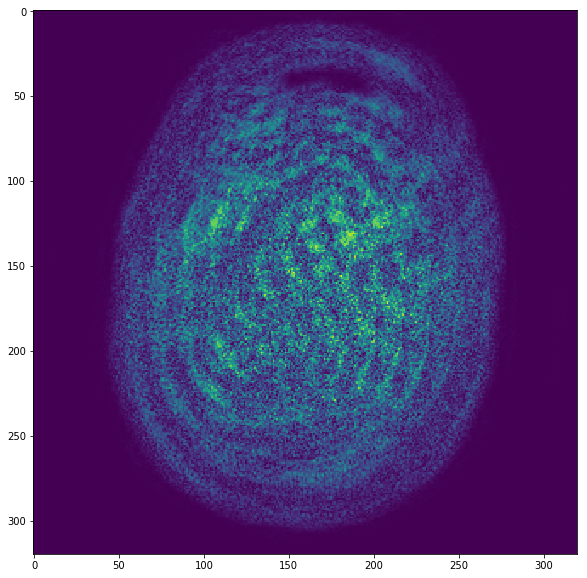

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(test_arr[0])
plt.show()

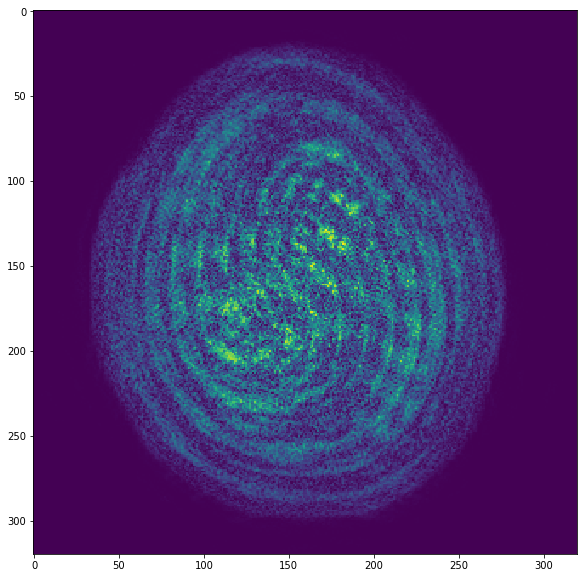

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(test_arr[2])
plt.show()

In [14]:
np.concatenate((np.array([]), np.array([1,2,3])))

array([1., 2., 3.])

In [20]:
np.ceil(1001/4)

251.0